# Guessing The Flag with Decision Tree

What are some of the features that would provide clue for defining **Continent** of a country from just their **flag**?
Maybe some of the colors are good indicators. The presence or absence of certain shapes could provide a hint. 

In this project, I've used decision trees to try to predict the continent of flags based on several of these features.


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

### Investigating The Data

The Flag Attribute Information for this dataset is from [UCI’s Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Flags). 
The data set is stored in `flags.csv`.

In [19]:
flags = pd.read_csv('flags.csv', header = 0)

flags.columns

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')

In [5]:
flags.head()

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


### Creating Data and Labels

Their are 30 attribute information in `Flag` dataset. But for now to guess landmass of the `Mistry Flag` only the color attributes are given. So, my first attempt would be considering the color attributes to train the model.

In [20]:
labels = flags[['Landmass']]

data = flags[['Red', 'Green', 'Blue', 'Gold', 'White', 'Black', 'Orange']]


In [21]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2, random_state = 1)


In [22]:
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(train_data, train_labels)
print ("With just Color Features and default Tree Depth,\nScore is: {}".format(tree.score(test_data, test_labels)))

print("\nTree Depth: {}".format(tree.tree_.max_depth))


With just Color Features and default Tree Depth,
Score is: 0.38461538461538464

Tree Depth: 7


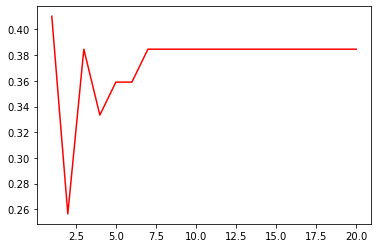

In [23]:
scores = []

for i in range(1, 21):
  tree = DecisionTreeClassifier(max_depth = i, random_state = 1)
  tree.fit(train_data, train_labels)
  scores.append(tree.score(test_data, test_labels))

plt.figure()
plt.plot(range(1,21), scores, color = 'red')

plt.show()

#### With these features after looping through different tree depth size, still model seems underfitting.

### Training Model with Both Flag Color & Shape Features

In [24]:
data = flags[["Red", "Green", "Blue", "Gold",
 "White", "Black", "Orange",
 "Circles",
"Crosses","Saltires","Quarters","Sunstars",
"Crescent","Triangle"]]


In [25]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2, random_state = 1)

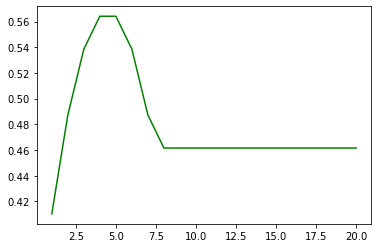

In [26]:
scores = []

for i in range(1, 21):
  tree = DecisionTreeClassifier(max_depth = i, random_state = 1)
  tree.fit(train_data, train_labels)
  scores.append(tree.score(test_data, test_labels))

plt.figure()
plt.plot(range(1,21), scores, color = 'green')

plt.show()


In [28]:
tree = DecisionTreeClassifier(max_depth = 5, random_state = 1)
tree.fit(train_data, train_labels)
print("After Pruning and with Added Features,\nTree Score is: {}".format(tree.score(test_data, test_labels)))


After Pruning and with Added Features,
Tree Score is: 0.5641025641025641


# Guessing Continent of flag from this ***Decision Tree Model***

<img align="center" alt="Profile" width="202px" src="flag.png">

In [29]:
mistry_flag = [[1, 0, 1, 1,
 0, 0, 0,
 0,0,0,0,0,
0,1]]


print(tree.predict(mistry_flag))

[3]


landmass Attributes from [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Flags): 
1. N.America, 
2. S.America, 
3. Europe, 
4. Africa, 
4. Asia,
6. Oceania

### From [UCI’s Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Flags) attribute information. The model predicts the country is from European Continent